In [3]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from datasets import Dataset

In [4]:
images = glob.glob('C:/Users/vince/FlareSense-v2/*/*/*.png')
images = [x.replace('\\', '/') for x in images]

In [5]:
images[0]

'C:/Users/vince/FlareSense-v2/test_images/0/100_HUMAIN_59_2022-05-13_07_59_00.png'

In [6]:
df = pd.DataFrame()

In [27]:
df

,image,label,filename,antenna,datetime
0,C:/Users/vince/FlareSense-v2/test_images/0/100...,0,100_HUMAIN_59_2022-05-13_07_59_00.png,HUMAIN_59,2022-05-13 07:59:00
1,C:/Users/vince/FlareSense-v2/test_images/0/100...,0,100_INDIA-OOTY_02_2023-02-12_02_46_00.png,INDIA-OOTY_02,2023-02-12 02:46:00
2,C:/Users/vince/FlareSense-v2/test_images/0/101...,0,101_GERMANY-DLR_63_2023-12-17_10_02_00.png,GERMANY-DLR_63,2023-12-17 10:02:00
3,C:/Users/vince/FlareSense-v2/test_images/0/102...,0,102_HUMAIN_59_2022-09-05_13_25_00.png,HUMAIN_59,2022-09-05 13:25:00
4,C:/Users/vince/FlareSense-v2/test_images/0/102...,0,102_INDIA-OOTY_02_2023-07-07_08_05_00.png,INDIA-OOTY_02,2023-07-07 08:05:00
...,...,...,...,...,...
30833,C:/Users/vince/FlareSense-v2/val_images/1/999_...,1,999_USA-ARIZONA-ERAU_01_2024-01-23_22_03_00.png,USA-ARIZONA-ERAU_01,2024-01-23 22:03:00
30834,C:/Users/vince/FlareSense-v2/val_images/1/999_...,1,999_USA-ARIZONA-ERAU_01_2024-02-01_21_00_00.png,USA-ARIZONA-ERAU_01,2024-02-01 21:00:00
30835,C:/Users/vince/FlareSense-v2/val_images/1/999_...,1,999_USA-ARIZONA-ERAU_01_2024-02-10_17_00_00.png,USA-ARIZONA-ERAU_01,2024-02-10 17:00:00
30836,C:/Users/vince/FlareSense-v2/val_images/1/999_...,1,999_USA-ARIZONA-ERAU_01_2024-02-13_15_21_00.png,USA-ARIZONA-ERAU_01,2024-02-13 15:21:00


In [21]:
base_paths = df['image'].str.split('/', expand=True).iloc[:, 5::]

In [24]:
base_paths

,5,6
0,0,100_HUMAIN_59_2022-05-13_07_59_00.png
1,0,100_INDIA-OOTY_02_2023-02-12_02_46_00.png
2,0,101_GERMANY-DLR_63_2023-12-17_10_02_00.png
3,0,102_HUMAIN_59_2022-09-05_13_25_00.png
4,0,102_INDIA-OOTY_02_2023-07-07_08_05_00.png
...,...,...
30833,1,999_USA-ARIZONA-ERAU_01_2024-01-23_22_03_00.png
30834,1,999_USA-ARIZONA-ERAU_01_2024-02-01_21_00_00.png
30835,1,999_USA-ARIZONA-ERAU_01_2024-02-10_17_00_00.png
30836,1,999_USA-ARIZONA-ERAU_01_2024-02-13_15_21_00.png


In [25]:
df['image'] = images
base_paths = df['image'].str.split('/', expand=True).iloc[:, 5::]
df['label'] = base_paths[5]
df['filename'] = base_paths[6]
df['antenna'] = base_paths[6].str.split('_', expand=True)[1] + '_' + base_paths[6].str.split('_', expand=True)[2]
df['datetime'] = base_paths[6].str.split('_', expand=True)[3] + ' ' + base_paths[6].str.split('_', expand=True)[4] + ':' + base_paths[6].str.split('_', expand=True)[5]
df['datetime'] = pd.to_datetime(df['datetime'])


In [26]:
df

,image,label,filename,antenna,datetime
0,C:/Users/vince/FlareSense-v2/test_images/0/100...,0,100_HUMAIN_59_2022-05-13_07_59_00.png,HUMAIN_59,2022-05-13 07:59:00
1,C:/Users/vince/FlareSense-v2/test_images/0/100...,0,100_INDIA-OOTY_02_2023-02-12_02_46_00.png,INDIA-OOTY_02,2023-02-12 02:46:00
2,C:/Users/vince/FlareSense-v2/test_images/0/101...,0,101_GERMANY-DLR_63_2023-12-17_10_02_00.png,GERMANY-DLR_63,2023-12-17 10:02:00
3,C:/Users/vince/FlareSense-v2/test_images/0/102...,0,102_HUMAIN_59_2022-09-05_13_25_00.png,HUMAIN_59,2022-09-05 13:25:00
4,C:/Users/vince/FlareSense-v2/test_images/0/102...,0,102_INDIA-OOTY_02_2023-07-07_08_05_00.png,INDIA-OOTY_02,2023-07-07 08:05:00
...,...,...,...,...,...
30833,C:/Users/vince/FlareSense-v2/val_images/1/999_...,1,999_USA-ARIZONA-ERAU_01_2024-01-23_22_03_00.png,USA-ARIZONA-ERAU_01,2024-01-23 22:03:00
30834,C:/Users/vince/FlareSense-v2/val_images/1/999_...,1,999_USA-ARIZONA-ERAU_01_2024-02-01_21_00_00.png,USA-ARIZONA-ERAU_01,2024-02-01 21:00:00
30835,C:/Users/vince/FlareSense-v2/val_images/1/999_...,1,999_USA-ARIZONA-ERAU_01_2024-02-10_17_00_00.png,USA-ARIZONA-ERAU_01,2024-02-10 17:00:00
30836,C:/Users/vince/FlareSense-v2/val_images/1/999_...,1,999_USA-ARIZONA-ERAU_01_2024-02-13_15_21_00.png,USA-ARIZONA-ERAU_01,2024-02-13 15:21:00


In [9]:
train_df, val_df, test_df = df[df.image.str.contains('train_images')],  df[df.image.str.contains('val_images')], df[df.image.str.contains('test_images')]

In [10]:
def assert_no_overlap_and_drop(train_df, val_df, test_df):
    train_files = set(train_df['filename'])
    val_files = set(val_df['filename'])
    test_files = set(test_df['filename'])

    overlap_train_val = train_files.intersection(val_files)
    overlap_train_test = train_files.intersection(test_files)

    if overlap_train_val:
        print(f"Dropping {len(overlap_train_val)} items from Train set due to overlap with Validation set.")
        # Drop overlapping entries from train_df
        train_df = train_df[~train_df['filename'].isin(overlap_train_val)]
    else:
        print("No overlap between Train and Validation sets.")
    
    if overlap_train_test:
        print(f"Dropping {len(overlap_train_test)} items from Train set due to overlap with Test set.")
        # Drop overlapping entries from train_df
        train_df = train_df[~train_df['filename'].isin(overlap_train_test)]
    else:
        print("No overlap between Train and Test sets.")
    
    # Checking overlap between Validation and Test sets remains the same since we don't modify these dataframes here
    overlap_val_test = val_files.intersection(test_files)
    if overlap_val_test:
        print(f"Overlap between Validation and Test sets: {overlap_val_test}")
        val_df = val_df[~val_df['filename'].isin(overlap_val_test)]
    else:
        print("No overlap between Validation and Test sets.")
    
    return train_df, val_df, test_df

# Perform the assertion check and drop overlaps
train_df, val_df, test_df = assert_no_overlap_and_drop(train_df, val_df, test_df)


Dropping 3 items from Train set due to overlap with Validation set.
Dropping 5 items from Train set due to overlap with Test set.
Overlap between Validation and Test sets: {'999_Australia-ASSA_62_2022-04-29_03_43_00.png'}


In [28]:
train_df

,image,label,filename,antenna,datetime
3185,C:/Users/vince/FlareSense-v2/train_images/0/10...,0,100_ALASKA-HAARP_62_2023-04-08_15_31_00.png,ALASKA-HAARP_62,2023-04-08 15:31:00
3186,C:/Users/vince/FlareSense-v2/train_images/0/10...,0,100_BIR_01_2022-05-25_12_55_00.png,BIR_01,2022-05-25 12:55:00
3187,C:/Users/vince/FlareSense-v2/train_images/0/10...,0,100_HUMAIN_59_2022-12-06_08_13_00.png,HUMAIN_59,2022-12-06 08:13:00
3188,C:/Users/vince/FlareSense-v2/train_images/0/10...,0,100_INDIA-GAURI_01_2023-06-24_05_30_00.png,INDIA-GAURI_01,2023-06-24 05:30:00
3189,C:/Users/vince/FlareSense-v2/train_images/0/10...,0,100_SWISS-Landschlacht_62_2023-01-19_12_51_00.png,SWISS-Landschlacht_62,2023-01-19 12:51:00
...,...,...,...,...,...
27672,C:/Users/vince/FlareSense-v2/train_images/1/99...,1,99_INDIA-OOTY_02_2022-08-27_02_10_00.png,INDIA-OOTY_02,2022-08-27 02:10:00
27673,C:/Users/vince/FlareSense-v2/train_images/1/99...,1,99_INDIA-OOTY_02_2024-01-03_07_38_00.png,INDIA-OOTY_02,2024-01-03 07:38:00
27674,C:/Users/vince/FlareSense-v2/train_images/1/99...,1,99_SSRT_59_2023-04-03_02_50_00.png,SSRT_59,2023-04-03 02:50:00
27675,C:/Users/vince/FlareSense-v2/train_images/1/99...,1,99_SSRT_59_2024-02-15_06_35_00.png,SSRT_59,2024-02-15 06:35:00


In [11]:
train_df.to_csv('C:/Users/vince/FlareSense-v2/train_metadata.csv', index=False)
test_df.to_csv('C:/Users/vince/FlareSense-v2/test_metadata.csv', index=False)
val_df.to_csv('C:/Users/vince/FlareSense-v2/val_metadata.csv', index=False)

C:\Users\vince\AppData\Local\Temp\ipykernel_16028\2707482047.py:10: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  date_range_per_antenna = val_df.groupby('antenna')['datetime'].agg([min, max])
C:\Users\vince\AppData\Local\Temp\ipykernel_16028\2707482047.py:10: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  date_range_per_antenna = val_df.groupby('antenna')['datetime'].agg([min, max])


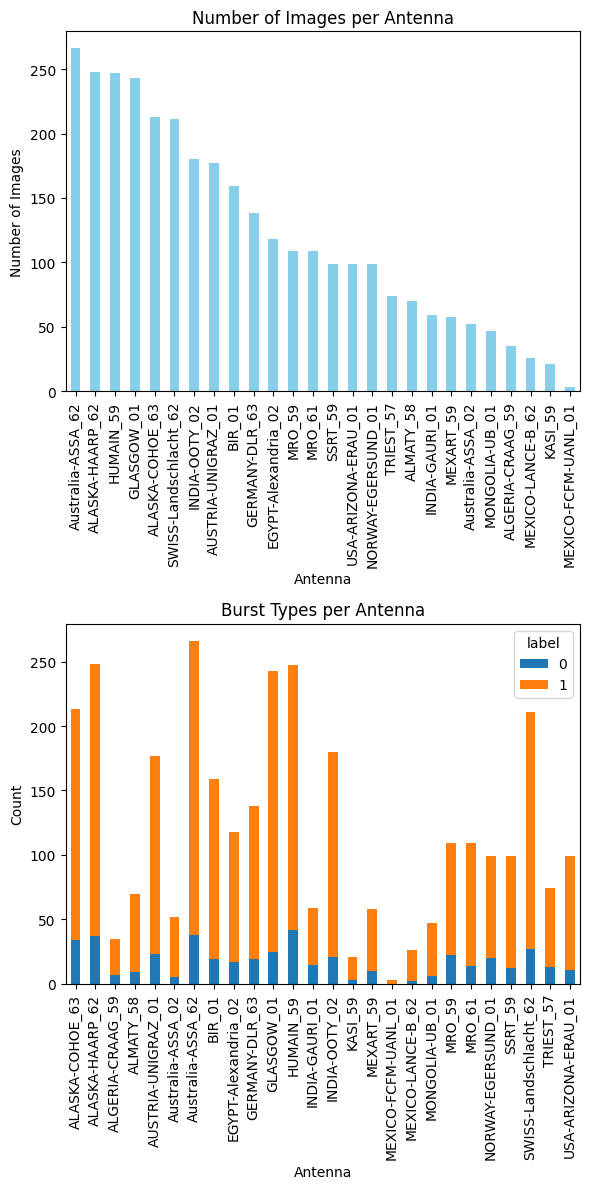

In [12]:
# EDA
import matplotlib.pyplot as plt
# Number of images per antenna
images_per_antenna = val_df['antenna'].value_counts()

# Number of burst types per antenna
burst_types_per_antenna = val_df.groupby('antenna')['label'].value_counts().unstack(fill_value=0)

# Date range per antenna
date_range_per_antenna = val_df.groupby('antenna')['datetime'].agg([min, max])

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(6, 12))

# Images per antenna
images_per_antenna.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Number of Images per Antenna')
ax[0].set_xlabel('Antenna')
ax[0].set_ylabel('Number of Images')

# Burst types per antenna
burst_types_per_antenna.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Burst Types per Antenna')
ax[1].set_xlabel('Antenna')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
from datasets import load_dataset
train = load_dataset('csv', data_files='C:/Users/vince/FlareSense-v2/train_metadata.csv')
valid = load_dataset('csv', data_files='C:/Users/vince/FlareSense-v2/val_metadata.csv')
test = load_dataset('csv', data_files='C:/Users/vince/FlareSense-v2/test_metadata.csv')

Generating train split: 39097 examples [00:00, 376726.05 examples/s]
Generating train split: 4991 examples [00:00, 355895.47 examples/s]
Generating train split: 5076 examples [00:00, 294479.61 examples/s]


In [12]:
from datasets import Image
train = train.cast_column("image", Image())
valid = valid.cast_column("image", Image())
test = test.cast_column("image", Image())

In [13]:
from datasets import DatasetDict
dd = DatasetDict({"train": train['train'],"validation": valid['train'], "test":test['train']})

In [14]:
dd

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'filename', 'antenna', 'datetime'],
        num_rows: 39097
    })
    validation: Dataset({
        features: ['image', 'label', 'filename', 'antenna', 'datetime'],
        num_rows: 4991
    })
    test: Dataset({
        features: ['image', 'label', 'filename', 'antenna', 'datetime'],
        num_rows: 5076
    })
})

In [17]:
dd.push_to_hub('i4ds/radio-sunburst-ecallisto-binary-cleaned-4', private=False)

Uploading the dataset shards: 100%|██████████| 1/1 [00:05<00:00,  5.33s/it]
c:\Users\vince\miniconda3\envs\radio_sunburst_labelcreation\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vince\.cache\huggingface\hub\datasets--i4ds--radio-sunburst-ecallisto-binary-cleaned-3. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  war

CommitInfo(commit_url='https://huggingface.co/datasets/i4ds/radio-sunburst-ecallisto-binary-cleaned-3/commit/e0fb4006beeebfabddaf4f8e1790b49fe44b03d9', commit_message='Upload dataset', commit_description='', oid='e0fb4006beeebfabddaf4f8e1790b49fe44b03d9', pr_url=None, pr_revision=None, pr_num=None)

In [18]:
dd['test']['label'][-1]

1

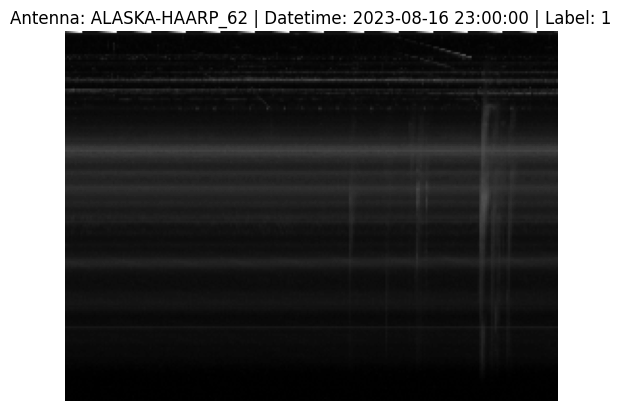

In [19]:
# Display the image
plt.imshow(dd['train'][35000]['image'], cmap='gray')  # 'gray' colormap for mode=L (grayscale)
plt.title(f"Antenna: {dd['train'][35000]['antenna']} | Datetime: {dd['train'][35000]['datetime']} | Label: {dd['train'][35000]['label']}")
plt.axis('off')  # Turn off the axis
plt.show()